In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df=pd.read_csv("https://raw.githubusercontent.com/akhi-07-D/Loan_prediction_Set/refs/heads/main/loan_data_set_lyst1728376986423.csv")

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [52]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


## 1.High Level Data Understanding & Data Cleaning:

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [56]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,147.350163,341.628664,0.835505
std,6109.041673,2926.248369,87.444391,65.656819,0.371027
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,167.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [58]:
df.shape

(614, 13)

In [59]:
pd.set_option('display.max_columns', None)
df.describe(include='all').round(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614,614.00,614.00,614.00,614.00,614.00,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,500,400,354,480,528,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.46,1621.25,147.35,341.63,0.84,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.04,2926.25,87.44,65.66,0.37,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.00,0.00,9.00,12.00,0.00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.50,0.00,100.00,360.00,1.00,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.50,1188.50,128.00,360.00,1.00,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.00,2297.25,167.75,360.00,1.00,NaN,NaN


In [61]:
df.duplicated().sum()

0

In [62]:
df.drop_duplicates()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## 2.Check for missing values & Handle missing values

In [50]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [51]:
df.fillna(method="ffill",inplace=True)
df.fillna(method="bfill",inplace=True)

In [32]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Note:All missing values are filled with valid entries — no NaN values left.

## 4. Convert categorical variables using one-hot encoding

In [44]:
df1=pd.get_dummies(df,columns=["Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"])

In [45]:
df1

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,LP001002,5849,0.0,128.0,360.0,1.0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
2,LP001005,3000,0.0,66.0,360.0,1.0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,0,1,0,1,...,0,0,1,1,0,0,0,1,0,1
4,LP001008,6000,0.0,141.0,360.0,1.0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,1.0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1
610,LP002979,4106,0.0,40.0,180.0,1.0,0,1,0,1,...,1,1,0,1,0,1,0,0,0,1
611,LP002983,8072,240.0,253.0,360.0,1.0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,1
612,LP002984,7583,0.0,187.0,360.0,1.0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,1


## Each unique category value becomes a new column.Each row will have 1 in the column that applies, and 0 in the rest.
 Note :This process increases the number of columns, but makes the data suitable for machine learning models.


## 5.Data Types of Columns.

In [46]:
df1.dtypes

Loan_ID                     object
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Loan_Status_N                uint8
Loan_Status_Y                uint8
dtype: object

## 6.Drop redundant dummy variables

In [47]:
df1.drop("Gender_Female",axis=1,inplace=True)
df1.drop("Married_No",axis=1,inplace=True)
df1.drop("Education_Graduate",axis=1,inplace=True)
df1.drop("Self_Employed_No",axis=1,inplace=True)
df1.drop("Property_Area_Rural",axis=1,inplace=True)
df1.drop("Loan_Status_N",axis=1,inplace=True)
df1.drop("Dependents_3+",axis=1,inplace=True)

In [43]:
df1

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,5849,0.0,128.0,360.0,1.0,1,0,1,0,0,0,0,0,1,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,1,1,0,1,0,0,0,0,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,1,0,1,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,0,0,1,1
4,LP001008,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,1.0,0,0,1,0,0,0,0,0,0,1
610,LP002979,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,0,0,0,0,1
611,LP002983,8072,240.0,253.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
612,LP002984,7583,0.0,187.0,360.0,1.0,1,1,0,0,1,0,0,0,1,1


## 7.Define feature and target variables

In [48]:
x=df1.iloc[:,2:15]
y=df1.iloc[:,-1]

In [64]:
x

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,128.0,360.0,1.0,1,0,1,0,0,0,0,0,1
1,1508.0,128.0,360.0,1.0,1,1,0,1,0,0,0,0,0
2,0.0,66.0,360.0,1.0,1,1,1,0,0,0,1,0,1
3,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,0,0,1
4,0.0,141.0,360.0,1.0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,71.0,360.0,1.0,0,0,1,0,0,0,0,0,0
610,0.0,40.0,180.0,1.0,1,1,0,0,0,0,0,0,0
611,240.0,253.0,360.0,1.0,1,1,0,1,0,0,0,0,1
612,0.0,187.0,360.0,1.0,1,1,0,0,1,0,0,0,1


In [68]:
print(y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8


## 8.Split the dataset into training and testing sets

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=(0))

In [71]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("x_train sample:")
print(x_train.head())

print("x_test sample:")
print(x_test.head())

print("y_train sample:")
print(y_train.head())

print("y_test sample:")
print(y_test.head())


x_train shape: (460, 13)
x_test shape: (154, 13)
y_train shape: (460,)
y_test shape: (154,)
x_train sample:
     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
46                 0.0        44.0             360.0             1.0   
272             1857.0       126.0             360.0             1.0   
474             4648.0       162.0             360.0             1.0   
382                0.0       156.0             360.0             1.0   
283             1666.0        54.0             360.0             1.0   

     Gender_Male  Married_Yes  Dependents_0  Dependents_1  Dependents_2  \
46             1            1             0             1             0   
272            1            0             1             0             0   
474            1            0             0             0             1   
382            0            0             1             0             0   
283            0            0             1             0             0   

     Edu

## 9.Train Logistic Regression model

In [72]:
m1=LogisticRegression()
m1.fit(x_train, y_train)
y_pred=m1.predict(x_test)

In [73]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0],
      dtype=uint8)

In [74]:
m1

LogisticRegression()

## 10.Evaluate the model

In [75]:
acc = accuracy_score(y_test, y_pred)
c = confusion_matrix(y_test, y_pred)
print(acc)
print(c)

0.8506493506493507
[[ 23  20]
 [  3 108]]


## 11.Data Visualization

## a.For whole dataset

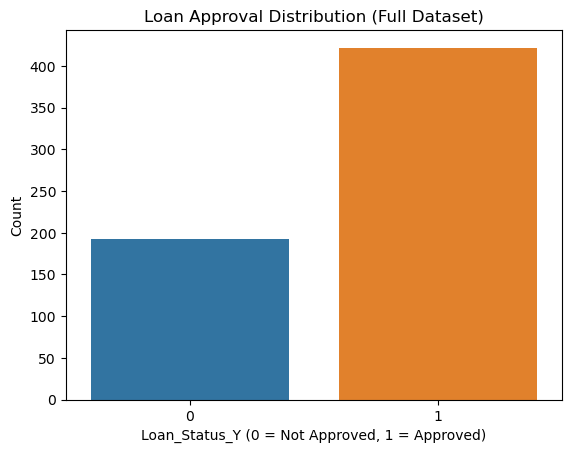

In [76]:
sns.countplot(x=y)
plt.title("Loan Approval Distribution (Full Dataset)")
plt.xlabel("Loan_Status_Y (0 = Not Approved, 1 = Approved)")
plt.ylabel("Count")
plt.show()


## b.Coapplicant Income vs Loan Amount

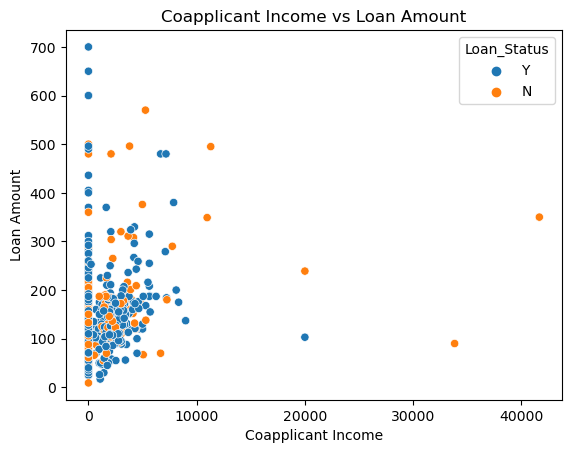

In [85]:
sns.scatterplot(data=df, x="CoapplicantIncome", y="LoanAmount", hue="Loan_Status")
plt.title("Coapplicant Income vs Loan Amount")
plt.xlabel("Coapplicant Income")
plt.ylabel("Loan Amount")
plt.show()


## c.Average Applicant Income by Property Area

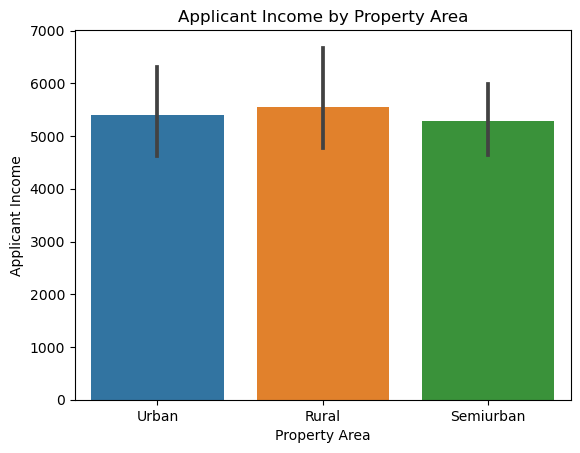

In [86]:
sns.barplot(data=df, x="Property_Area", y="ApplicantIncome")
plt.title("Applicant Income by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Applicant Income")
plt.show()
